In [160]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os 

In [69]:
def mutual_info(M, X):
    # Ensure the inputs are normalized
    assert np.isclose(np.sum(X), 1.0), "X should be normalized"
    assert np.all(np.isclose(np.sum(M, axis=1), 1.0)), "Rows of M should sum to 1"

    num_x = M.shape[0]
    num_y = M.shape[1]

    # Calculate p(y)
    p_y = np.dot(X, M)

    # Calculate p(x, y)
    p_xy = np.zeros((num_x, num_y))
    for x in range(num_x):
        for y in range(num_y):
            p_xy[x, y] = X[x] * M[x, y]

    def log_term(x, y):
        if p_xy[x, y] > 0 and p_y[y] > 0:  # Ensure we don't divide by zero or take log of zero
            log_value = np.log2(p_xy[x, y] / (X[x] * p_y[y]))
            return log_value
        return 0

    I = np.sum([p_xy[x, y] * log_term(x, y) for x in range(num_x) for y in range(num_y)])
    
    return I

# Example usage:
M = np.array([[0.28, 0.72], [0.72, 0.28]])
X = np.array([0.5, 0.5])
result = mutual_info(M, X)
print("Mutual Information:", result)

Mutual Information: 0.14454918943986927


In [70]:
mutual_info(np.array([[1,0], [0,1]]), np.array([0.5,0.5]))

1.0

In [71]:
mutual_info(np.array([[0.28,0.72], [0.72, 0.28]]), np.array([0.5,0.5]))

0.14454918943986927

In [72]:
mutual_info(np.array([[0.33,0.33,0.33], [0.33,0.33,0.33], [0.33,0.33,0.33]]), np.array([0.33,0.33, 0.33]))

AssertionError: X should be normalized

# Binary

In [204]:
# Calculate mutual information for each pair of weights
MIs = np.zeros((100,100))
weights = np.linspace(0, 1, 101)
labels = list()

for i, w1 in enumerate(weights):
    pair1 = np.array([w1, 1 - w1])
    for j, w2 in enumerate(weights):
        pair2 = np.array([w2, 1 - w2])
        M = np.array([pair1, pair2])
        X = np.array([0.5, 0.5]) # uniform input distribution
        MIs[i-1, j-1] = mutual_info(M, X)
        
for i, w1 in enumerate(weights):
    pair1 = np.array([w1, 1 - w1])
    if i % 5 == 0:
        labels.append(str(pair1))
        


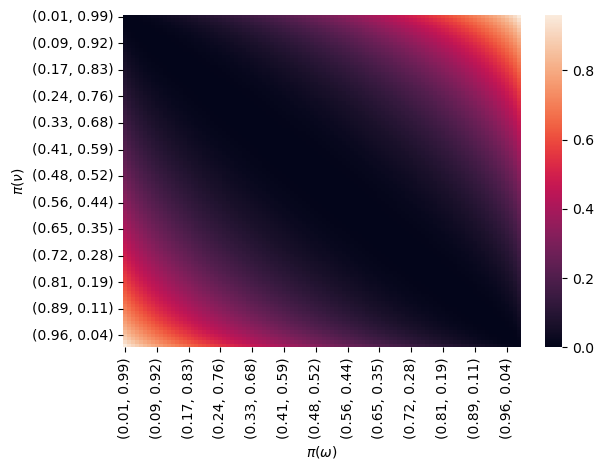

In [205]:
zeros = np.where(MIs==0)
zero_pairs = [(zeros[0][i], zeros[1][i]) for i in range(len(zeros[0]))]

ax = sns.heatmap(MIs)


xticks = ax.get_xticks()
yticks = ax.get_yticks()

xticks_every_5 = xticks[::2]
yticks_every_5 = xticks[::2]

xtick_labels_every_5 = [f'({tick/100:.2f}, {(1 - tick/100):.2f})' for tick in xticks_every_5]
ytick_labels_every_5 = [f'({tick/100:.2f}, {(1 - tick/100):.2f})' for tick in yticks_every_5]


ax.set_xticks(xticks_every_5)
ax.set_xticklabels(xtick_labels_every_5)


ax.set_yticks(yticks_every_5)
ax.set_yticklabels(ytick_labels_every_5)

ax.set_ylabel(r'$\pi(\nu)$')
ax.set_xlabel(r'$\pi(\omega)$')

plt.tight_layout()

plt.savefig('/home/sagar/modeling-info-spread/reports/figures/solution_space_MI_flat_prior.pdf')

plt.show()



In [206]:
np.where(MIs==0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]))

In [207]:
len(zeros[0])

100

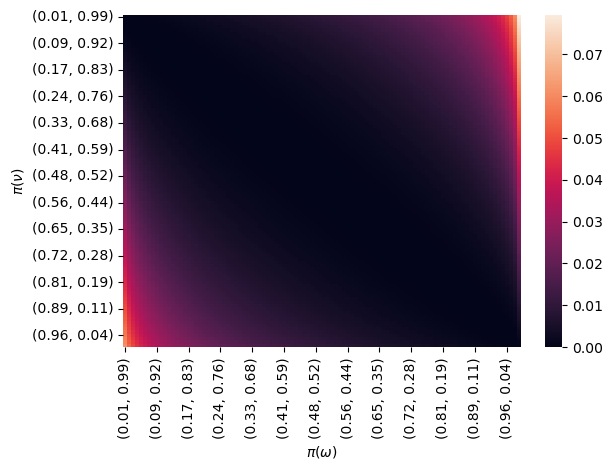

In [208]:
# Calculate mutual information for each pair of weights
MIs = np.zeros((100,100))
weights = np.linspace(0, 1, 101)
labels = list()

for i, w1 in enumerate(weights):
    pair1 = np.array([w1, 1 - w1])
    for j, w2 in enumerate(weights):
        pair2 = np.array([w2, 1 - w2])
        M = np.array([pair1, pair2])
        X = np.array([0.01, 0.99]) # this input distribution is the difference
        MIs[i-1, j-1] = mutual_info(M, X)
        
for i, w1 in enumerate(weights):
    pair1 = np.array([w1, 1 - w1])
    if i % 5 == 0:
        labels.append(str(pair1))
        
ax = sns.heatmap(MIs)

xticks = ax.get_xticks()
yticks = ax.get_yticks()

xticks_every_5 = xticks[::2]
yticks_every_5 = xticks[::2]

xtick_labels_every_5 = [f'({tick/100:.2f}, {(1 - tick/100):.2f})' for tick in xticks_every_5]
ytick_labels_every_5 = [f'({tick/100:.2f}, {(1 - tick/100):.2f})' for tick in yticks_every_5]


ax.set_xticks(xticks_every_5)
ax.set_xticklabels(xtick_labels_every_5)


ax.set_yticks(yticks_every_5)
ax.set_yticklabels(ytick_labels_every_5)

ax.set_ylabel(r'$\pi(\nu)$')
ax.set_xlabel(r'$\pi(\omega)$')

plt.tight_layout()


plt.savefig('/home/sagar/modeling-info-spread/reports/figures/solution_space_MI_uneven_prior.pdf')

plt.show()


In [209]:
np.where(MIs==0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 95, 96, 97, 98, 99]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 95, 96, 97, 98, 99]))

# Mutual Information Binary Symmetric Channel

In [80]:
from src.models.NSI import NSI
from src.models.channel import *

In [106]:
N = 10000
T = 1000

k = 4
beta = 0.01

err = 0.04
enc_err = 0.1

test_channel = single_flip_channel(1, err)
test_model = NSI(N=N, T=T, P=test_channel)

test_perf_enc = np.array([[1,0], [0,1]])
test_noisy_enc = single_flip_channel(1, enc_err)

In [107]:
test_pw = [0.5, 0.5]

In [108]:
test_w = np.array([1, 0])
test_v = np.array([0, 1])

In [126]:
test_noisy_enc @ test_w

array([0.9, 0.1])

In [127]:
test_s_w = np.random.choice(a=np.array([0,1]), size=10, p=np.array(test_noisy_enc @ test_w))
test_seed_w = np.array([Counter(test_s_w)[i]/N for i in [0,1]])

In [129]:
test_sim_w = test_model.homogeneous_analytic(beta=beta, k=k, seedI=test_seed_w)

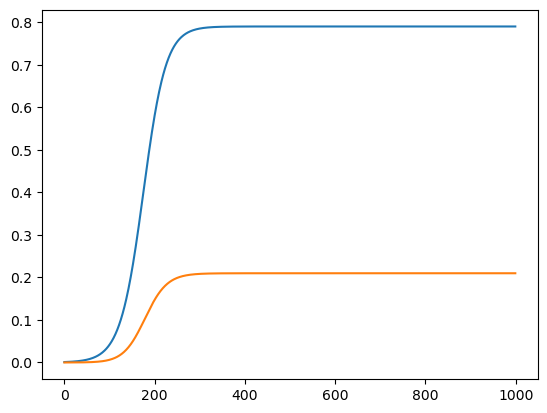

In [131]:
plt.plot(range(T), test_sim_w.I)

In [132]:
test_s_v = np.random.choice(a=np.array([0,1]), size=10, p=np.array(test_noisy_enc @ test_v))
test_seed_v = np.array([Counter(test_s_v)[i]/N for i in [0,1]])
test_sim_v = test_model.homogeneous_analytic(beta=beta, k=k, seedI=test_seed_v)

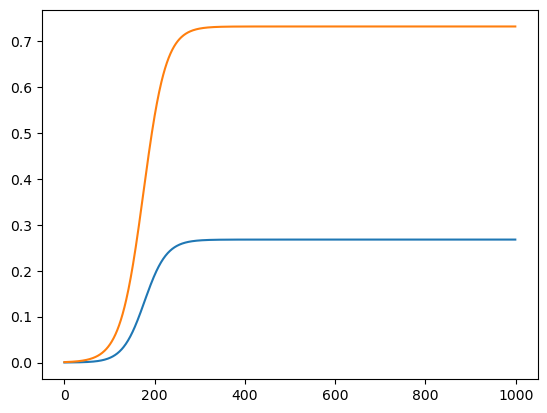

In [134]:
plt.plot(range(T), test_sim_v.I)

In [154]:
test_MI = [mutual_info(np.concatenate(([test_sim_w.I[t]/np.sum(test_sim_w.I[t])], 
                                  [test_sim_v.I[t]/np.sum(test_sim_v.I[t])]), axis=0),
                      np.array([0.5,0.5])) for t in range(T)]

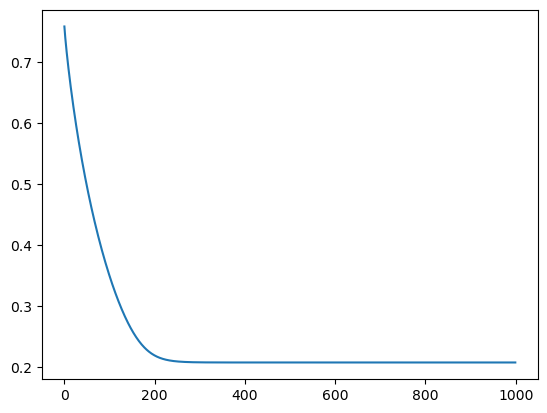

In [156]:
plt.plot(range(T), test_MI)

# Plot Final MI for a perfect encoding 

In [ ]:
bin_sym_loads = []

BSPATH = '/data_users1/sagar/modeling-info-spread/simulations/bin_sym/'


for seed_name, seed in zip(['seed0', 'seed1'], [np.array([1,0]), np.array([0,1])]:
    for err_name, err in zip(os.listdir(BSPATH+seed_name),:
                           
        channel = single_flip_channel(1, err)
        model = NSI(N=N, T=T, P=channel)
        
        
        for f in os.listdir(BSPATH+seed_name+ '/' + err):
            a = np.load(BSPATH+seed_name+ '/' + err '/' +f)
            bin_sym_loads.append(a)

In [181]:
test_seed0_bsc = list()
for f in os.listdir('/data_users1/sagar/modeling-info-spread/simulations/bin_sym/seed0/0.01'):
    a = np.load('/data_users1/sagar/modeling-info-spread/simulations/bin_sym/seed0/0.01/'+f)
    test_seed0_bsc.append(a)

In [182]:
test_seed1_bsc = list()
for f in os.listdir('/data_users1/sagar/modeling-info-spread/simulations/bin_sym/seed1/0.01'):
    a = np.load('/data_users1/sagar/modeling-info-spread/simulations/bin_sym/seed1/0.01/'+f)
    test_seed1_bsc.append(a)

In [193]:
all_test_mi = list()
for i in range(20):
    
    x_mi = list()
    
    x1 = test_seed0_bsc[i]['arr_0']
    x2 = test_seed1_bsc[i]['arr_0']
    
    for t in range(T):
        M = np.concatenate(([x1[t]/np.sum(x1[t])], [x2[t]/np.sum(x2[t])]), axis=0)
        x_mi.append(mutual_info(M, np.array([0.5,0.5])))
        
    all_test_mi.append(x_mi)
    
test_channel = single_flip_channel(1, 0.01)
test_model = NSI(N=N, T=T, P=test_channel)


# Mean Field
mean_field_mi = list()
model_x1 = test_model.homogeneous_analytic(beta=beta, k=k, seedI=np.array([1/N,0]))
model_x2 = test_model.homogeneous_analytic(beta=beta, k=k, seedI=np.array([0,1/N]))

for t in range(T):
        M = np.concatenate(([model_x1.I[t]/np.sum(model_x1.I[t])], [model_x2.I[t]/np.sum(model_x2.I[t])]), axis=0)
        mean_field_mi.append(mutual_info(M, np.array([0.5,0.5])))

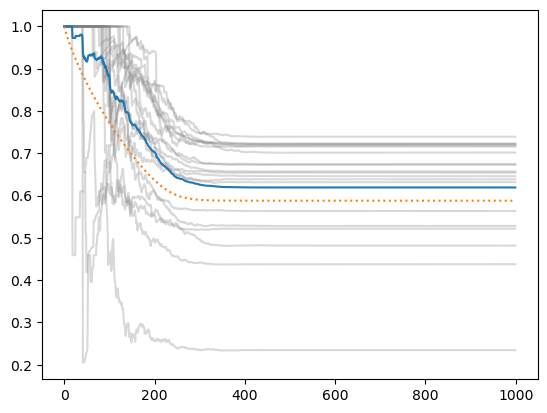

In [194]:
for y in all_test_mi:
    plt.plot(range(T), y, alpha=0.3, color='gray')
plt.plot(range(T), np.mean(np.array(all_test_mi), axis=0))
plt.plot(range(T), mean_field_mi, linestyle="dotted")

In [191]:
np.mean(np.array(all_test_mi), axis=0)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.9729574 , 0.9729574 ,
       0.9729574 , 0.9729574 , 0.9729574 , 0.9729574 , 0.9729574 ,
       0.97743975, 0.97743975, 0.97743975, 0.97743975, 0.97743975,
       0.97743975, 0.97743975, 0.97743975, 0.97743975, 0.97743975,
       0.98049933, 0.98049933, 0.98049933, 0.98049933, 0.98049933,
       0.9732492 , 0.94076681, 0.9294809 , 0.9294809 , 0.92368122,
       0.92368122, 0.92623274, 0.9199805 , 0.92045619, 0.91687464,
       0.91697163, 0.9192503 , 0.92629899, 0.93131424, 0.93140704,
       0.93223158, 0.932902  , 0.93343869, 0.93083994, 0.93143526,
       0.93230341, 0.93305834, 0.93474572, 0.93151083, 0.93162431,
       0.93625313, 0.93659605, 0.92517753, 0.92434365, 0.92307801,
       0.92169201, 0.92206304, 0.92070514, 0.9227449 , 0.92328